sector
Telecommunications        65441.487500
Food & Drug Stores        49665.166667
Health Care               34912.179221
Retailing                 30648.937662
Motor Vehicles & Parts    24567.100000
Name: revenue, dtype: float64


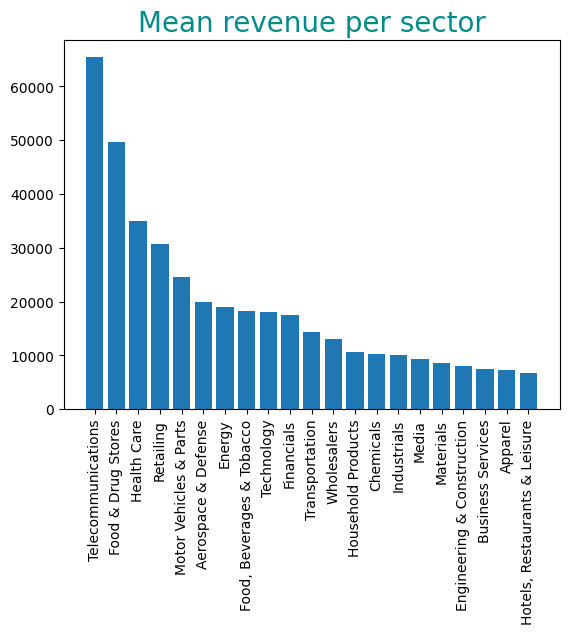

,company,profit,revenue,ceo_woman,ceo
43,Citigroup,21952.0,79865.0,True,Jane Fraser
90,Oracle,13746.0,40479.0,True,Safra A. Catz
33,United Parcel Service,12890.0,97287.0,True,Carol B. Tomé
24,General Motors,10019.0,127004.0,True,Mary T. Barra
3,CVS Health,7910.0,292111.0,True,Karen Lynch


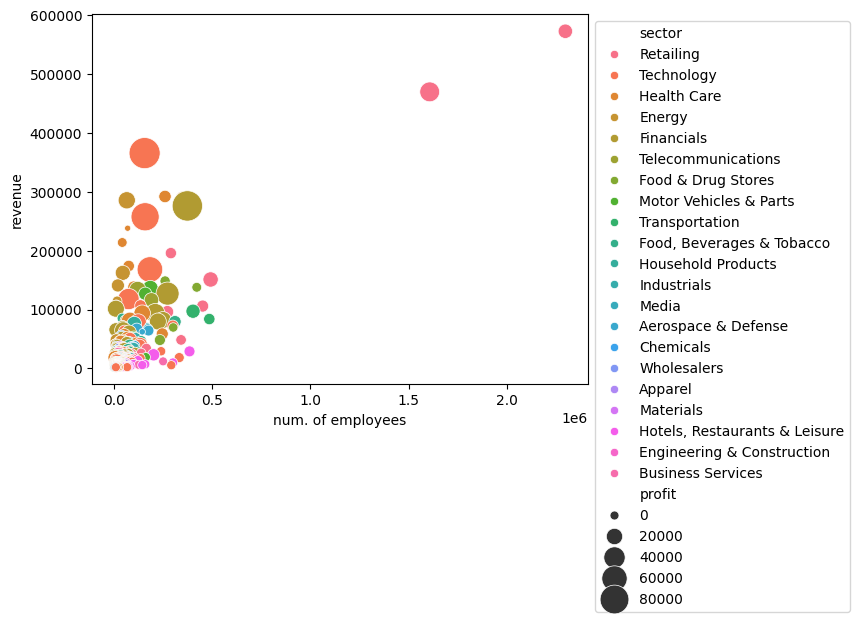

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

df = pd.read_csv("Fortune_1000.csv")
# print(df.info())
df.columns = df.columns.str.strip().str.lower()
df['ticker'].fillna('N/A', inplace=True)
df['profit'] = df['profit'].astype(float)
df.dropna(subset=['profit','num. of employees'], inplace=True)
df['ceo_woman'] = np.where(df['ceo_woman'] == 'yes', True, False)
df['ceo_founder']=np.where(df['ceo_founder'] == 'yes', True, False)
df['newcomer']= np.where(df['newcomer'] == 'yes', True, False)
df['profitable']=np.where(df['profitable'] == 'yes', True, False)
# print(df.info())
# print(df.loc[df['company']=='Lam Research'])
# df.isnull().any()
reve = df.groupby(['sector'])['revenue'].mean().sort_values(ascending=False)
print(reve.head())
plt.bar(reve.index, reve.values)
plt.title('Mean revenue per sector', fontsize=20, color='darkcyan')
plt.xticks(rotation=90)
plt.show()
ax = sns.scatterplot(x=df['num. of employees'], y=df['revenue'], hue=df['sector'], size=df['profit'], data=df, sizes=(10, 500))
ax.legend(loc='upper left', bbox_to_anchor=(1,1))


# state_count = df[['company','sector','state']]
# state_count = state_count.groupby(['state'], as_index=False)['company'].count()
# state_count.rename(columns={'company':'company_count'}, inplace=True)
# state_count.sort_values(by='company_count', inplace=True, ascending=False)
# print(state_count.head(20))

# woman_df = df[['company','sector','ceo_woman']]
# woman_df = woman_df[woman_df['ceo_woman']==True]
# woman_df = woman_df.groupby(['sector'], as_index=False)['ceo_woman'].count()
# woman_df.sort_values(by='ceo_woman', ascending=False, inplace=True)
# woman_df
# y = woman_df['sector']
color = ['darksalmon','darkolivegreen','steelblue','darkorange','palevioletred','darkseagreen','midnightblue']
# plt.barh(width=width, y=y, color=color, edgecolor='dimgrey')
# plt.title('Number of Woman CEO per sector', fontsize=20, color='darkcyan')
# percent_woman = round(df['ceo_woman'].sum()/1000 *100, 1)
# percent_retail = round(woman_df.iloc[0,1]/woman_df['ceo_woman'].sum() *100, 1)
# percent_financial = round(woman_df.iloc[1,1]/woman_df['ceo_woman'].sum() *100, 1)
# plt.annotate(
#     text='In the fortune 1000 companies, \nonly {a}% of the CEOs are women. \nBesides, {b}% and {c}% of these women \nare in retailing and financial sector.'.format(a=percent_woman, b=percent_retail, c=percent_financial), 
#     xy=(5,12), 
#     fontsize=10,
#     backgroundcolor='wheat')

woman_ceo = df[['company','profit','revenue','ceo_woman','ceo']]
woman_ceo = woman_ceo[woman_ceo['ceo_woman']==True]
woman_ceo.sort_values(by='profit', ascending=False, inplace=True)
woman_ceo.head()

sector_df = df[['sector','profit','company']]
sector_sum_df = sector_df.groupby(['sector'], as_index=False).sum('profit')
sector_sum_df.sort_values(by='profit', ascending=False, inplace=True)
sector_sum_df.head(10)
sector_sum_df_top5 = sector_sum_df.head()
squarify.plot(
    sizes=sector_sum_df_top5['profit'],
    label=sector_sum_df_top5['sector'],
    alpha=0.5,
    text_kwargs={'fontsize':10},
    color=color)
plt.title('Profit percentage of top 5 sector', fontsize=18, color='navy')

# commercial_df = df[['sector','profit','revenue','num. of employees','company']]
# revenue_sum = commercial_df.groupby(['sector'], as_index=False).sum('revenue')
# revenue_sum.sort_values(by='revenue', ascending=False, inplace=True)
# revenue_sum.head()
# revenum_sum_top5 = revenue_sum.head(5)
# squarify.plot(
#     sizes=revenum_sum_top5['revenue'],
#     label=revenum_sum_top5['sector'],
#     alpha=0.5,
#     text_kwargs={'fontsize':10},
#     color=color)
# plt.title('Revenue percentage of top 5 sector', fontsize=18, color='navy')
